# Temperatura Global

[Berkeley Earth](http://berkeleyearth.org/) publica datos históricos de temperaturas globales y regionales, los cuales pueden ser descargados desde [acá](http://berkeleyearth.org/data/).

En este notebook intentaremos recrear la siguiente gráfica, publicada en el [Global Temperature Report for 2019](http://berkeleyearth.org/2019-temperatures/).

![image](http://berkeleyearth.org/wp-content/uploads/2020/01/2019_Projection-1024x577.png)

## Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Vamos a agrandar el tamaño de las imagenes para que se vean mejor en la presentación.
No hace falta que corras esto en tu computadora.

In [2]:
from matplotlib import rcParams

rcParams["figure.dpi"] = 150

## Descargamos los datos de tierra y océanos

In [3]:
data = np.loadtxt("http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt", comments="%")
data

array([[ 1.850e+03, -5.160e-01,  1.940e-01, ...,  1.730e-01,        nan,
               nan],
       [ 1.851e+03, -3.860e-01,  2.540e-01, ...,  2.190e-01,        nan,
               nan],
       [ 1.852e+03, -3.840e-01,  2.430e-01, ...,  2.100e-01, -3.720e-01,
         1.550e-01],
       ...,
       [ 2.017e+03,  8.390e-01,  4.600e-02, ...,  4.700e-02,  7.640e-01,
         4.300e-02],
       [ 2.018e+03,  7.730e-01,  4.600e-02, ...,  4.600e-02,        nan,
               nan],
       [ 2.019e+03,  9.060e-01,  4.500e-02, ...,  4.600e-02,        nan,
               nan]])

In [4]:
data.shape

(170, 9)

Definimos la temperatura de referencia a la cual están referidos los valores de anomalía de temperatura.

In [5]:
temperatura_referencia = 14.177

La primer columna de nuestro arreglo `data` contiene los años.

In [6]:
years = data[:, 0]

La segunda contiene la anomalía de temperatura anual, mientras que la cuarta tiene una media móvil de 5 años. Utilizaremos los valores de temperatura globales estimados a partir de mediciones en aire.

In [7]:
temp_anual = data[:, 1]
temp_5y = data[:, 3]

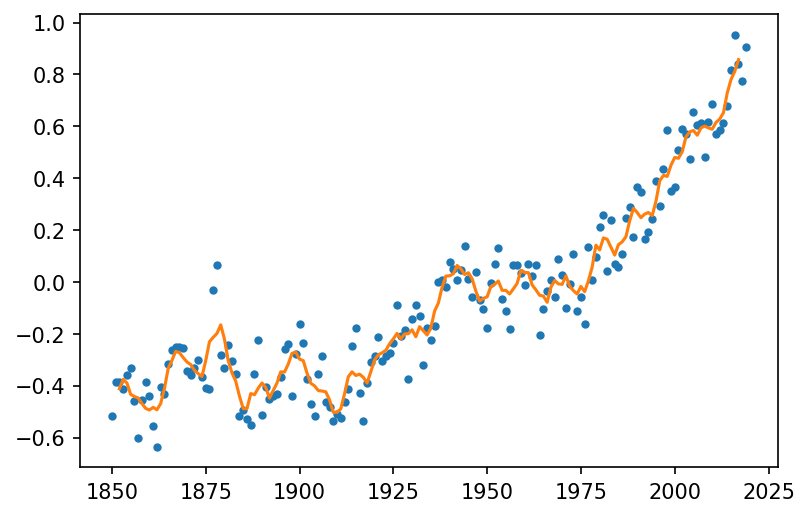

In [8]:
plt.plot(years, temp_anual, 'o', markersize=3)
plt.plot(years, temp_5y)
plt.show()

## Ajustemos la temperatura de referencia

Queremos que nuestros valores de anomalía de temperatura estén referidos a la media entre 1850 y 1900, en vez de la original.

In [9]:
temp_referencia_1850_1900 = np.nanmean(temp_5y[years < 1900] + temperatura_referencia)
temp_referencia_1850_1900

13.810312500000002

Luego modificamos los valores de anomalía de temperatura para que estén referidas al valor que obtuvimos antes.

In [10]:
temp_anual += temperatura_referencia - temp_referencia_1850_1900
temp_5y += temperatura_referencia - temp_referencia_1850_1900

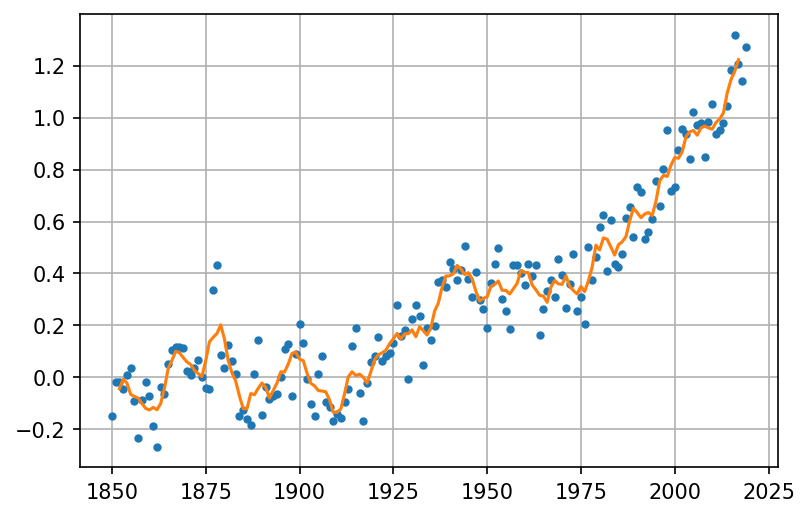

In [11]:
plt.plot(years, temp_anual, 'o', markersize=3)
plt.plot(years, temp_5y)
plt.grid()
plt.show()

## Regresión Lineal

Estimemos la tendencia entre 1980 y la actualidad, para luego realizar una proyección a futuro.

In [12]:
condicion = (years >= 1980) & np.logical_not(np.isnan(temp_5y))

reg = linregress(years[condicion], temp_5y[condicion])

In [13]:
reg

LinregressResult(slope=0.019100558047926465, intercept=-37.380461969307355, rvalue=0.9816764321413141, pvalue=1.6186218596182856e-27, stderr=0.0006179421698001234)

Realicemos la misma gráfica que antes, pero ahora con la proyección de la tendencia hasta el año 2070.

In [14]:
years_regresion = np.array([2020, 2070])
temp_regresion = reg.slope * years_regresion + reg.intercept

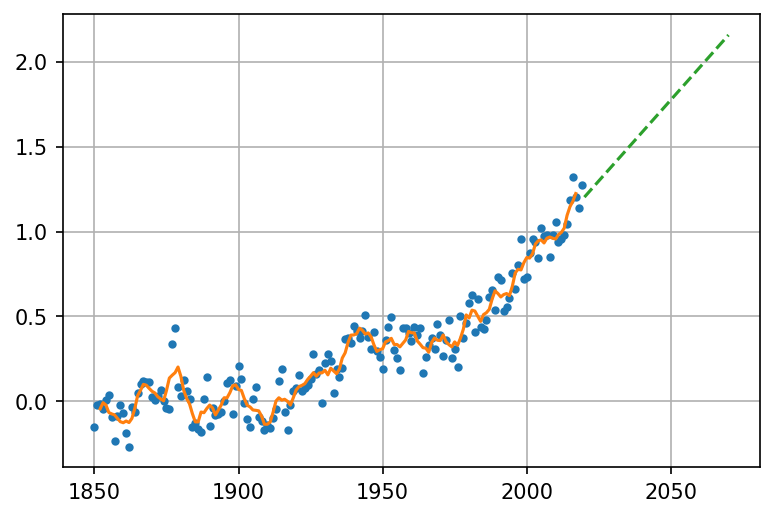

In [15]:
plt.plot(years, temp_anual, 'o', markersize=3)
plt.plot(years, temp_5y)
plt.plot(years_regresion, temp_regresion, '--')
plt.grid()
plt.show()

Veamos qué valores predice esta tendencia lineal para los años 2036 y 2063.

In [16]:
reg.slope * 2036 + reg.intercept

1.5082742162709266

In [17]:
reg.slope * 2063 + reg.intercept

2.0239892835649442

<div style="background-color: orange; padding: 20px;">

**ATENCIÓN**

Realizar este tipo de extrapolaciones sirven para realizar meras proyecciones hipotéticas: ¿qué _pasaría_ si los datos evolucionan con la misma tendencia que están teniendo hasta hoy en día?
Sin embargo, este tipo de proyecciones **no** pueden ser consideradas como **predicciones certeras** de la evolución de un dado sistema de estudio.

En general, para hacer predicciones a futuro es necesario realizar modelos que tengan en cuenta comportamientos básicos del sistema de estudio. Por ejemplo, en el caso del clima, es necesario modelar el comportamiento de la atmósfera, su interacción con la Tierra sólida y líquida, su interacción con radiación externa, etc. haciendo uso de las leyes físicas que las gobiernan. Estos modelos suelen ser muy complejos de plantear y/o de resolver y muchas veces se requieren años de estudio por parte de grupos de trabajo para realizar predicciones precisas.

Muchos ejemplos de extrapolaciones **mal** interpretadas han surgido a partir de los datos de infectados de COVID-19 a principios de 2020.
    
</div>

## Mejorando la gráfica

Agreguemos a la gráfica que obtuvimos antes los elementos necesarios para que pueda ser interpretada correctamente.

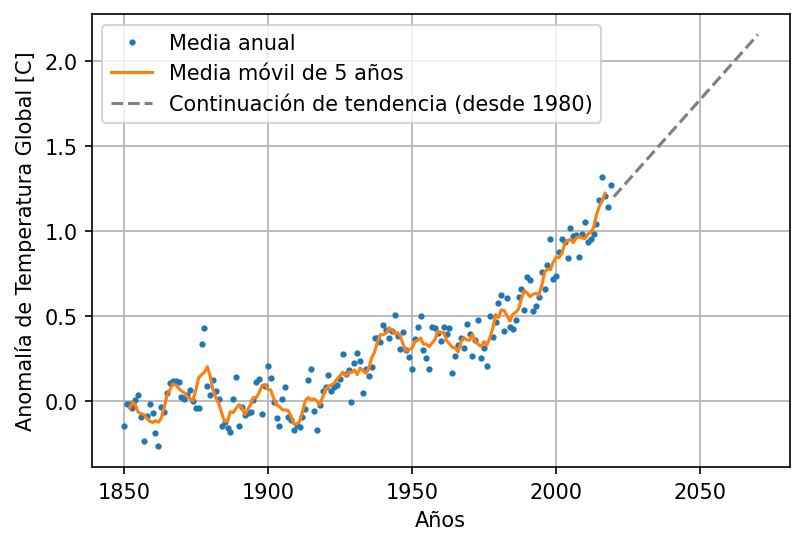

In [18]:
plt.plot(years, temp_anual, 'o', markersize=2, label="Media anual")
plt.plot(years, temp_5y, label="Media móvil de 5 años")
plt.plot(years_regresion, temp_regresion, '--', color="grey", label="Continuación de tendencia (desde 1980)")
plt.grid()
plt.xlabel("Años")
plt.ylabel("Anomalía de Temperatura Global [C]")
plt.legend()
plt.show()

## Añadiendo más elementos a la gráfica

In [19]:
temp_anual_err = data[:, 2]

In [20]:
temp_2036 = reg.slope * 2036 + reg.intercept
temp_2063 = reg.slope * 2063 + reg.intercept

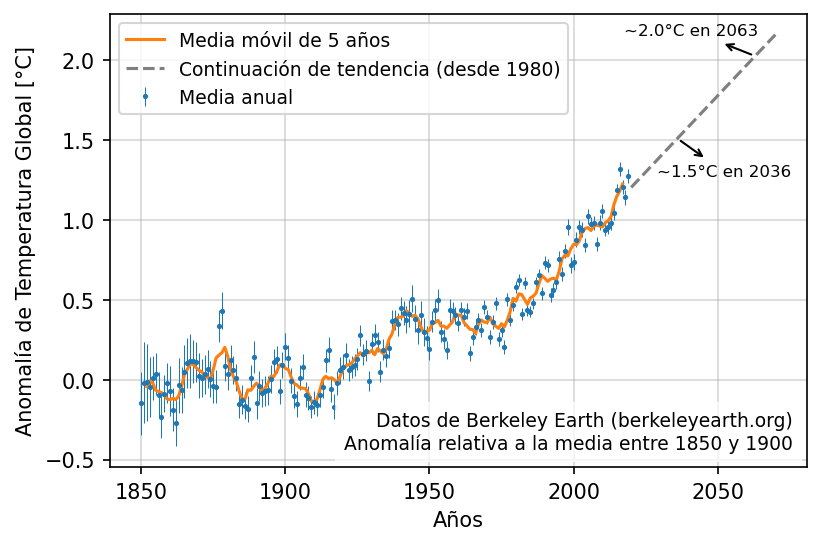

In [21]:
# Grafico media anual con barras de error usando plt.errorbar()
plt.errorbar(
    years,
    temp_anual,
    temp_anual_err,
    fmt=".",
    elinewidth=0.5,
    markersize=3,
    label="Media anual"
)

# Agrego media móvil a 5 años
plt.plot(years, temp_5y, label="Media móvil de 5 años")

# Y agrego la tendencia
plt.plot(years_regresion, temp_regresion, '--', color="grey", label="Continuación de tendencia (desde 1980)")

# Anoto las predicciones de temperatura a 2036 y 2063
plt.annotate(
    "~{:.1f}°C en {}".format(temp_2036, 2036),  # texto que aparece en la anotacion
    (2036, temp_2036),  # coordenadas del punto a anotar
    (-10, -18),  # offset del texto de la anotacion
    textcoords="offset points",  # indico que el tipo de coordenadas para el texto (offset poitns)
    arrowprops={"arrowstyle": "<-"},  # configuro el estilo de las flechas
    fontsize=8,  # configuro el tamaño de letra a 8 puntos
)
plt.annotate(
    "~{:.1f}°C en {}".format(temp_2063, 2063),  # texto que aparece en la anotacion
    (2063, temp_2063),  # coordenadas del punto a anotar
    (-63, 10),  # offset del texto de la anotacion
    textcoords="offset points",  # indico que el tipo de coordenadas para el texto (offset poitns)
    arrowprops={"arrowstyle": "<-"},  # configuro el estilo de las flechas
    fontsize=8,  # configuro el tamaño de letra a 8 puntos
)

# Agrego información sobre la fuente y temperatura relativa
plt.annotate(
    "Datos de Berkeley Earth (berkeleyearth.org)\nAnomalía relativa a la media entre 1850 y 1900",
    (0.98, 0.04),  # coordenadas del texto relativo a fraccion de los ejes
    xycoords="axes fraction",  # configuro tipo de coordenadas del texto (fraccion de los ejes)
    horizontalalignment='right',  # configuro alineacion del texto
    fontsize=9,
    bbox={"alpha": 0.7, "color": "white"}, # agregamos fondo blanco para facilitar la lectura
)

plt.grid(alpha=0.5)  # con alpha le pongo transparecia a la grilla
plt.xlabel("Años")
plt.ylabel("Anomalía de Temperatura Global [°C]")
plt.legend(fontsize=9)
plt.show()